In [1]:
#Importing necessary packages
import pandas as pd
import yfinance as yf #Importing yfinance
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
#Importing TESLA data that aligns with our dates
ticker = "TSLA"
start_date = "2015-01-01"
end_date = "2025-12-31"

tsla = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
tsla.reset_index(inplace=True)
tsla = tsla[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]
tsla.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
print(tsla.columns)
print(type(tsla.columns))

MultiIndex([(     'Date',     ''),
            (     'Open', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (    'Close', 'TSLA'),
            (   'Volume', 'TSLA'),
            ('Adj_Close', 'TSLA')],
           names=['Price', 'Ticker'])
<class 'pandas.core.indexes.multi.MultiIndex'>


In [4]:
tsla.columns = tsla.columns.get_level_values(0)
tsla.head()

Price,Date,Open,High,Low,Close,Volume,Adj_Close
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,14.620667
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,14.006000
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,14.085333
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,14.063333
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,14.041333


In [5]:
musk_df = pd.read_csv("https://raw.githubusercontent.com/katrinag2004/TeslaDS/refs/heads/main/DATA/elon_musk_timeline.csv")
musk_df.head()

,Date,Event,Category,Description,Source
0,12-11-2015,OpenAI announced,Business/Tech,OpenAI publicly announced as nonprofit AI lab.,https://openai.com/index/introducing-openai/
1,10-14-2015,Tesla Autopilot v1 released,Business/Tech,Tesla rolls out first Autopilot features to cu...,https://www.tesla.com/blog
2,03-31-2016,Tesla Model 3 unveiled,Business,Model 3 reveal; hundreds of thousands of reser...,https://abcnews.go.com/Technology/tesla-model-...
3,06-21-2016,Neuralink incorporated,Business/Tech,Neuralink founded (incorporation date).,https://en.wikipedia.org/wiki/Neuralink
4,08-01-2016,SolarCity accepts Tesla offer,Business,SolarCity board accepts Tesla’s acquisition of...,https://www.reuters.com/article/business/solar...


In [6]:
musk_df.dtypes

,0
Date,object
Event,object
Category,object
Description,object
Source,object


In [7]:
musk_df['Date'] = pd.to_datetime(musk_df['Date'], format="%m-%d-%Y")
tsla['Date'] = pd.to_datetime(tsla['Date'])

In [8]:
# Merge Tesla stock with Musk events
tsla_event_df = pd.merge(tsla, musk_df, on='Date', how='left')  # left join keeps all Tesla dates


In [9]:
#df = df.drop('Source', axis=1)
tsla_event_df.fillna({
    'Event': 0,
    'Category': 'none',
    'Description': 'none'
}, inplace=True)

In [10]:
tsla_event_df[tsla_event_df['Event'] != 0]

,Date,Open,High,Low,Close,Volume,Adj_Close,Event,Category,Description,Source
197,2015-10-14,14.711333,14.730000,14.362000,14.458667,46566000,14.458667,Tesla Autopilot v1 released,Business/Tech,Tesla rolls out first Autopilot features to cu...,https://www.tesla.com/blog
238,2015-12-11,15.016000,15.050000,14.442667,14.468000,49030500,14.468000,OpenAI announced,Business/Tech,OpenAI publicly announced as nonprofit AI lab.,https://openai.com/index/introducing-openai/
312,2016-03-31,15.289333,15.828000,15.000667,15.318000,120193500,15.318000,Tesla Model 3 unveiled,Business,Model 3 reveal; hundreds of thousands of reser...,https://abcnews.go.com/Technology/tesla-model-...
369,2016-06-21,14.712000,14.838000,14.587333,14.640667,67935000,14.640667,Neuralink incorporated,Business/Tech,Neuralink founded (incorporation date).,https://en.wikipedia.org/wiki/Neuralink
397,2016-08-01,15.700000,15.775333,15.292000,15.334000,60244500,15.334000,SolarCity accepts Tesla offer,Business,SolarCity board accepts Tesla’s acquisition of...,https://www.reuters.com/article/business/solar...
474,2016-11-17,12.232667,12.632667,12.140667,12.577333,73306500,12.577333,Tesla closes SolarCity acquisition,Business,Tesla completes ~$2B acquisition of SolarCity.,https://www.reuters.com/article/business/tesla...
647,2017-07-28,22.459333,22.639999,22.167334,22.337999,73206000,22.337999,First Model 3 deliveries,Business,Tesla hands over first 30 Model 3 cars.,https://www.reuters.com/article/business/tesla...
725,2017-11-16,20.932667,21.209333,20.753332,20.833332,87331500,20.833332,Tesla Semi & new Roadster unveiled,Business,Tesla debuts electric semi-truck and next-gen ...,https://www.reuters.com
779,2018-02-06,21.680668,22.414667,21.566668,22.264668,76326000,22.264668,Falcon Heavy maiden flight,Business/Space,First Falcon Heavy launch; Tesla Roadster as d...,https://www.nasa.gov/history/5-years-ago-first...
905,2018-08-07,22.922667,25.830667,22.610001,25.304667,463137000,25.304667,“Funding secured” tweet,Controversy/Business,Tweets intent to take Tesla private at $420; s...,https://www.reuters.com


In [11]:
tsla_event_df.loc[tsla_event_df['Event'] != 0, 'Event'] = 1

In [12]:
tsla_event_df['Category'].value_counts()

,count
Category,
none,2682
Business,10
Business/Space,7
Business/Tech,5
Business/Social,4
Legal/Business,2
Business/Controversy,2
Social/Political,1
Legal/Controversy,1


In [13]:
tsla_encoded = pd.get_dummies(tsla_event_df, columns=['Category'], drop_first=True)
tsla_encoded = tsla_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
y = tsla_encoded['Close']

In [14]:
exog_vars = tsla_encoded[['Event'] + [col for col in tsla_encoded.columns if 'Category_' in col]] #Defining exogeneous variables for the events model

In [15]:
model_base = ARIMA(y, order=(5,1,2)) #Base ARIMA model
model_base_fit = model_base.fit()
model_base_fit

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [16]:
import itertools #Defining ranges to iterate arguments of ARIMA through

p = range(0, 6)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [17]:
best_aic = float('inf') #Iterating through a baseline ARIMA model that doesn't include any events. It includes only historial financial data.
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f"Best ARIMA order (no events): {best_order} with AIC={best_aic}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/s

Best ARIMA order (no events): (2, 1, 2) with AIC=18292.575607820683


In [18]:
model_base = ARIMA(y, order=(2,1,2)) #Base ARIMA model
model_base_fit = model_base.fit()
model_base_fit

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
exog_vars = exog_vars.apply(pd.to_numeric, errors='coerce')  # convert True/False → 1/0
exog_vars = exog_vars.fillna(0)

In [20]:
model_event = ARIMA(y, exog=exog_vars, order=(5,1,2)) #Fitting the events model
model_event_fit = model_event.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [21]:
if exog_vars is not None:
    best_aic = float('inf')
    best_order_event = None
    best_model_event = None

    for order in pdq:
        try:
            model = ARIMA(y, exog=exog_vars, order=order)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order_event = order
                best_model_event = model_fit
        except:
            continue

    print(f"Best ARIMAX order (with events): {best_order_event} with AIC={best_aic}")
else:
    best_model_event = None

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best ARIMAX order (with events): (3, 1, 2) with AIC=18279.24904948975


In [22]:
model_event = ARIMA(y, exog=exog_vars, order=(3,1,2)) #Fitting the events model
model_event_fit = model_event.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
tsla = tsla.copy()
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla = tsla.set_index('Date').sort_index()

In [27]:
tsla_close = tsla['Close']

In [36]:
forecast_steps = 30
future_dates = pd.bdate_range("2025-10-13", periods=forecast_steps)

In [37]:
base_res = model_base_fit.get_forecast(steps=forecast_steps)
base_mean = base_res.predicted_mean
base_ci   = base_res.conf_int()
base_mean.index = future_dates
base_ci.index   = future_dates

In [38]:
exog_cols = exog_vars.columns
cat_cols = [c for c in exog_cols if c.startswith("Category_")]


In [39]:
exog_future = pd.DataFrame(0, index=future_dates, columns=exog_cols)
exog_future['Event'] = 0

In [40]:
event_res = model_event_fit.get_forecast(steps=forecast_steps, exog=exog_future)
event_mean = event_res.predicted_mean
event_ci   = event_res.conf_int()
event_mean.index = future_dates
event_ci.index   = future_dates

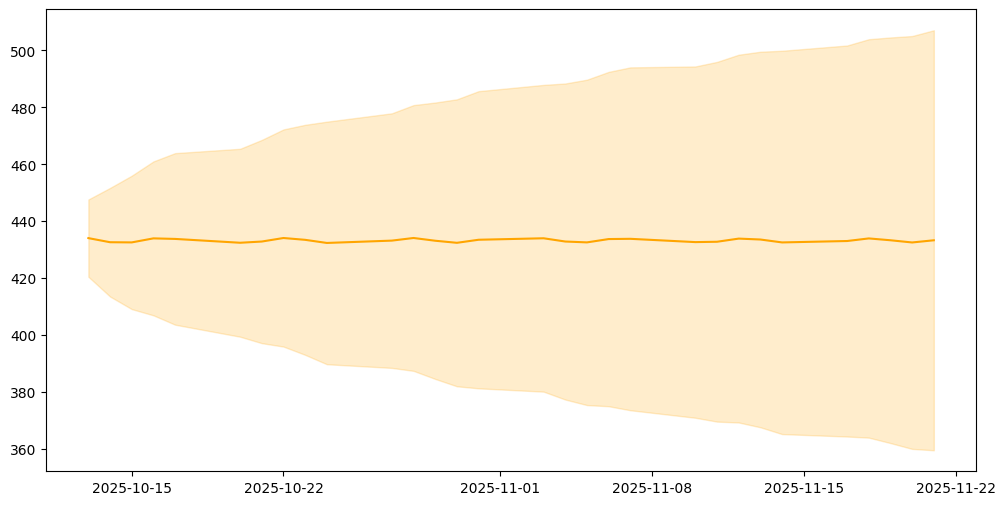

In [41]:
plt.figure(figsize=(12,6))
plt.plot(event_mean.index, event_mean, label="Event Forecast", color="orange")
plt.fill_between(event_ci.index, event_ci.iloc[:,0], event_ci.iloc[:,1],
                 color="orange", alpha=0.2)


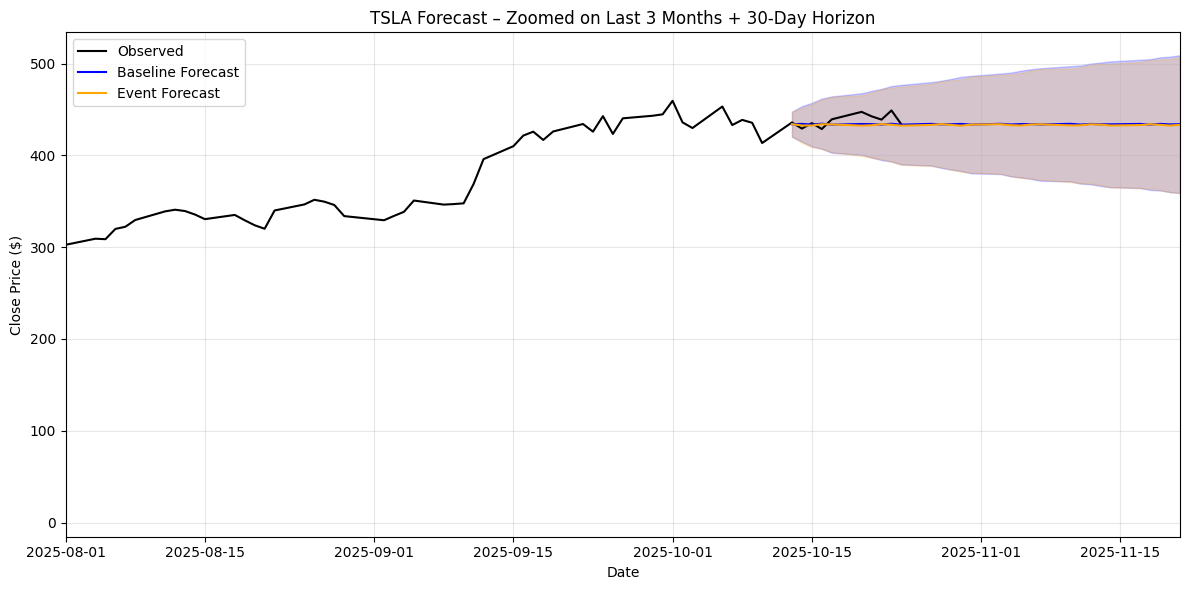

In [46]:
N = 60  # about 3 months of trading days
x_start = tsla_close.index[-N] if len(tsla_close) > N else tsla_close.index[0]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tsla_close.index, tsla_close.values, label="Observed", color="black")
ax.plot(base_mean.index, base_mean.values, label="Baseline Forecast", color="blue")
ax.fill_between(base_ci.index, base_ci.iloc[:,0], base_ci.iloc[:,1],
                color="blue", alpha=0.2)
ax.plot(event_mean.index, event_mean.values, label="Event Forecast", color="orange")
ax.fill_between(event_ci.index, event_ci.iloc[:,0], event_ci.iloc[:,1],
                color="orange", alpha=0.2)

# zoom: show only last ~N days of history + forecast
ax.set_xlim(x_start, event_mean.index[-1])
ax.set_title("TSLA Forecast – Zoomed on Last 3 Months + 30-Day Horizon")
ax.set_xlabel("Date"); ax.set_ylabel("Close Price ($)")
ax.legend(); ax.grid(True, alpha=.3)
plt.tight_layout(); plt.show()

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error

actual = tsla_close.loc[event_mean.index.intersection(tsla_close.index)]
preds  = event_mean.loc[actual.index]
rmse_event = np.sqrt(mean_squared_error(actual, preds))
print("Event model RMSE:", rmse_event)

Event model RMSE: 8.156284340619662


In [53]:
from sklearn.metrics import r2_score
r2 = r2_score(actual, preds)
print("R²:", r2)

R²: -0.5599587228142873


In [60]:
def mape(actual, pred):
    idx = actual.index.intersection(pred.index)
    a = actual.loc[idx]
    p = preds.loc[idx].reindex(a.index)
    return float((np.abs((a - p) / a)).mean() * 100.0)

mape(actual, preds)

1.4707757617113606

In [61]:
def percent_accuracy(actual, pred):
    # align by date
    idx = actual.index.intersection(pred.index)
    a = actual.loc[idx]
    p = pred.loc[idx].reindex(a.index)
    # absolute percent error per day
    ape = np.abs((a - p) / a) * 100
    # average percent error
    mape = ape.mean()
    # percent accuracy
    accuracy = 100 - mape
    return accuracy, mape

# Example usage
acc_base, mape_base = percent_accuracy(tsla_close, base_mean)
acc_event, mape_event = percent_accuracy(tsla_close, event_mean)

print(f"Baseline: Accuracy = {acc_base:.2f}%, MAPE = {mape_base:.2f}%")
print(f"Event:    Accuracy = {acc_event:.2f}%, MAPE = {mape_event:.2f}%")

Baseline: Accuracy = 98.60%, MAPE = 1.40%
Event:    Accuracy = 98.53%, MAPE = 1.47%
